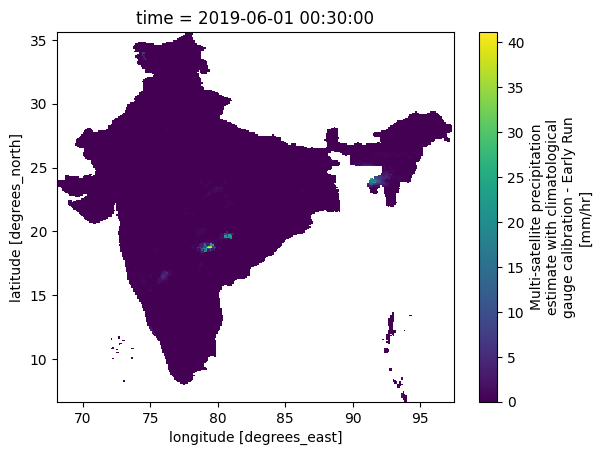

In [1]:
import xarray as xr
GPM_data = xr.open_dataset('./GPM_2019_sample.nc')
GPM_data.coords
GPM_data['GPM_3IMERGHHE_06_precipitationCal'].plot()

In [2]:
GPM_data.dims

Frozen({'time': 1, 'lat': 289, 'lon': 294, 'latv': 2, 'lonv': 2, 'nv': 2})

In [3]:
import numpy as np

In [4]:
lat = np.arange(6.625,35.87,0.25)
print(lat)
len(lat) # these are lats for interpolation

[ 6.625  6.875  7.125  7.375  7.625  7.875  8.125  8.375  8.625  8.875
  9.125  9.375  9.625  9.875 10.125 10.375 10.625 10.875 11.125 11.375
 11.625 11.875 12.125 12.375 12.625 12.875 13.125 13.375 13.625 13.875
 14.125 14.375 14.625 14.875 15.125 15.375 15.625 15.875 16.125 16.375
 16.625 16.875 17.125 17.375 17.625 17.875 18.125 18.375 18.625 18.875
 19.125 19.375 19.625 19.875 20.125 20.375 20.625 20.875 21.125 21.375
 21.625 21.875 22.125 22.375 22.625 22.875 23.125 23.375 23.625 23.875
 24.125 24.375 24.625 24.875 25.125 25.375 25.625 25.875 26.125 26.375
 26.625 26.875 27.125 27.375 27.625 27.875 28.125 28.375 28.625 28.875
 29.125 29.375 29.625 29.875 30.125 30.375 30.625 30.875 31.125 31.375
 31.625 31.875 32.125 32.375 32.625 32.875 33.125 33.375 33.625 33.875
 34.125 34.375 34.625 34.875 35.125 35.375 35.625]


117

In [5]:
lng = np.arange(68.12,97.87,0.25)
print(lng) # these are longitudes for interpolation
len(lng)

[68.12 68.37 68.62 68.87 69.12 69.37 69.62 69.87 70.12 70.37 70.62 70.87
 71.12 71.37 71.62 71.87 72.12 72.37 72.62 72.87 73.12 73.37 73.62 73.87
 74.12 74.37 74.62 74.87 75.12 75.37 75.62 75.87 76.12 76.37 76.62 76.87
 77.12 77.37 77.62 77.87 78.12 78.37 78.62 78.87 79.12 79.37 79.62 79.87
 80.12 80.37 80.62 80.87 81.12 81.37 81.62 81.87 82.12 82.37 82.62 82.87
 83.12 83.37 83.62 83.87 84.12 84.37 84.62 84.87 85.12 85.37 85.62 85.87
 86.12 86.37 86.62 86.87 87.12 87.37 87.62 87.87 88.12 88.37 88.62 88.87
 89.12 89.37 89.62 89.87 90.12 90.37 90.62 90.87 91.12 91.37 91.62 91.87
 92.12 92.37 92.62 92.87 93.12 93.37 93.62 93.87 94.12 94.37 94.62 94.87
 95.12 95.37 95.62 95.87 96.12 96.37 96.62 96.87 97.12 97.37 97.62]


119

In [6]:
# now we will fit these lat and longs to our file and see the differrence 
# currently there are 289 lats and 294 lons , we have to set it to 117 X 119
ln = GPM_data['lat']
ln
ln = ln.interp(lat=lat)
ln
GPM_data = GPM_data.interp(lat=ln,method="nearest")
GPM_data['lat'].shape

(117,)

In [7]:
GPM_data = GPM_data.interp(lon=lng,method="nearest")
GPM_data['lon'].shape

(119,)

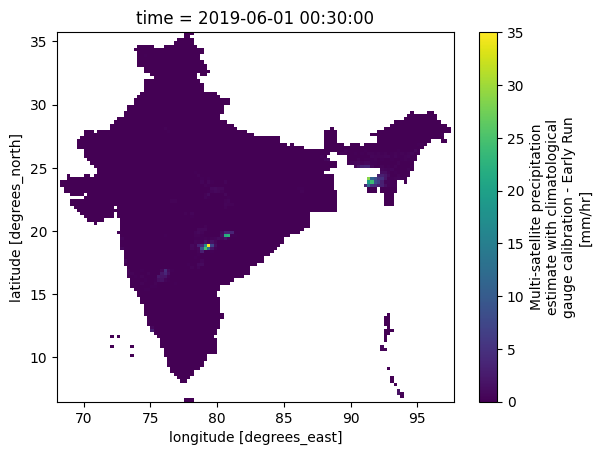

In [8]:
GPM_data['GPM_3IMERGHHE_06_precipitationCal'].plot()

In [9]:
GPM_data['GPM_3IMERGHHE_06_precipitationCal'].values.shape

(1, 117, 119)

In [10]:
# GPM_data.to_netcdf('./A_interpoled_GPM_data.nc')

In [11]:
file1= open('target_grid.txt','w')
print('lat','lon')
s=""
j=0
for i in lat:
        print(i,lng[j])
        s = str(i)+" "+str(lng[j])
        j=j+1
        file1.writelines(s)
        file1.writelines("\n")
file1.close()

lat lon
6.625 68.12
6.875 68.37
7.125 68.62
7.375 68.87
7.625 69.12
7.875 69.37
8.125 69.62
8.375 69.87
8.625 70.12
8.875 70.37
9.125 70.62
9.375 70.87
9.625 71.12
9.875 71.37
10.125 71.62
10.375 71.87
10.625 72.12
10.875 72.37
11.125 72.62
11.375 72.87
11.625 73.12
11.875 73.37
12.125 73.62
12.375 73.87
12.625 74.12
12.875 74.37
13.125 74.62
13.375 74.87
13.625 75.12
13.875 75.37
14.125 75.62
14.375 75.87
14.625 76.12
14.875 76.37
15.125 76.62
15.375 76.87
15.625 77.12
15.875 77.37
16.125 77.62
16.375 77.87
16.625 78.12
16.875 78.37
17.125 78.62
17.375 78.87
17.625 79.12
17.875 79.37
18.125 79.62
18.375 79.87
18.625 80.12
18.875 80.37
19.125 80.62
19.375 80.87
19.625 81.12
19.875 81.37
20.125 81.62
20.375 81.87
20.625 82.12
20.875 82.37
21.125 82.62
21.375 82.87
21.625 83.12
21.875 83.37
22.125 83.62
22.375 83.87
22.625 84.12
22.875 84.37
23.125 84.62
23.375 84.87
23.625 85.12
23.875 85.37
24.125 85.62
24.375 85.87
24.625 86.12
24.875 86.37
25.125 86.62
25.375 86.87
25.625 87.12
25.87

In [1]:
from cdo import *
CDO = Cdo()

In [13]:
CDO.operators

{'abs': 1,
 'acos': 1,
 'add': 1,
 'addc': 1,
 'addtrend': 1,
 'adipot': 1,
 'adisit': 1,
 'aexpr': 1,
 'aexprf': 1,
 'after': 1,
 'afterburner': 1,
 'anomaly': 1,
 'ap2hl': 1,
 'ap2hlx': 1,
 'ap2pl': 1,
 'ap2plx': 1,
 'apply': 1,
 'arg': 1,
 'asin': 1,
 'atan': 1,
 'atan2': 1,
 'bandpass': 1,
 'bitrounding': 1,
 'bottomvalue': 1,
 'boxavg': 1,
 'cat': 1,
 'cdiread': 0,
 'cdiwrite': 1,
 'changemulti': 1,
 'chcode': 1,
 'chlevel': 1,
 'chlevelc': 1,
 'chlevelv': 1,
 'chltype': 1,
 'chname': 1,
 'chparam': 1,
 'chtabnum': 1,
 'chunit': 1,
 'chvar': 1,
 'clone': 1,
 'cloudlayer': 1,
 'cmor': 0,
 'cmorlite': 1,
 'codetab': 0,
 'collgrid': 1,
 'complextopol': 2,
 'complextorect': 2,
 'conj': 1,
 'consecsum': 1,
 'consects': 1,
 'const': 1,
 'contour': 1,
 'conv_cmor_table': 0,
 'copy': 1,
 'cos': 1,
 'coshill': 1,
 'dayadd': 1,
 'dayavg': 1,
 'daycount': 1,
 'daydiv': 1,
 'daymax': 1,
 'daymean': 1,
 'daymin': 1,
 'daymul': 1,
 'daypctl': 1,
 'dayrange': 1,
 'daystd': 1,
 'daystd1': 1,
 'da

In [15]:
CDO.info(input='./A_Stack_Yearwise/1998_stack.nc')

['-1 :       Date     Time   Level Gridsize    Miss :     Minimum        Mean     Maximum : Parameter ID',
 '1 : 1998-05-31 22:30:00       0    13923    9047 :      0.0000    0.098346      20.691 : -1',
 '2 : 1998-05-31 22:30:00       0    13923    9047 :      1.0000      1.0000      1.0000 : -2',
 '3 : 1998-06-01 22:30:00       0    13923    9047 :      0.0000     0.27141      51.787 : -1',
 '4 : 1998-06-01 22:30:00       0    13923    9047 :      1.0000      1.0000      1.0000 : -2',
 '5 : 1998-06-02 22:30:00       0    13923    9047 :      0.0000     0.28155      39.467 : -1',
 '6 : 1998-06-02 22:30:00       0    13923    9047 :      1.0000      1.0000      1.0000 : -2',
 '7 : 1998-06-03 22:30:00       0    13923    9047 :      0.0000     0.12670      42.686 : -1',
 '8 : 1998-06-03 22:30:00       0    13923    9047 :      1.0000      1.0000      1.0000 : -2',
 '9 : 1998-06-04 22:30:00       0    13923    9047 :      0.0000     0.10058      18.565 : -1',
 '10 : 1998-06-04 22:30:00   

In [ ]:
# CDO.etccdi_cdd(input="./A_1998_00_Stack.nc",output="./1998_CDD_python.nc")

'./1998_CDD_python.nc'

In [ ]:
import xarray as xr
cdd_1998 = xr.open_dataset('./1998_CDD_python.nc')
cdd_1998

<xarray.Dataset>
Dimensions:                                                     (time: 1,
                                                                 lon: 119,
                                                                 bnds: 2,
                                                                 lat: 117)
Coordinates:
  * time                                                        (time) datetime64[ns] ...
  * lon                                                         (lon) float64 ...
  * lat                                                         (lat) float64 ...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds                                                    (lon, bnds) float64 ...
    lat_bnds                                                    (lat, bnds) float64 ...
    cddETCCDI                                                   (time, lat, lon) timedelta64[ns] ...
    number_of_cdd_periods_with_more_than_5days_per_time_period  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.2.3 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Sep 01 23:22:36 2023: cdo -O -s -etccdi_cdd ./A_1998_00...
    CDO:          Climate Data Operators version 2.2.1 (https://mpimet.mpg.de...

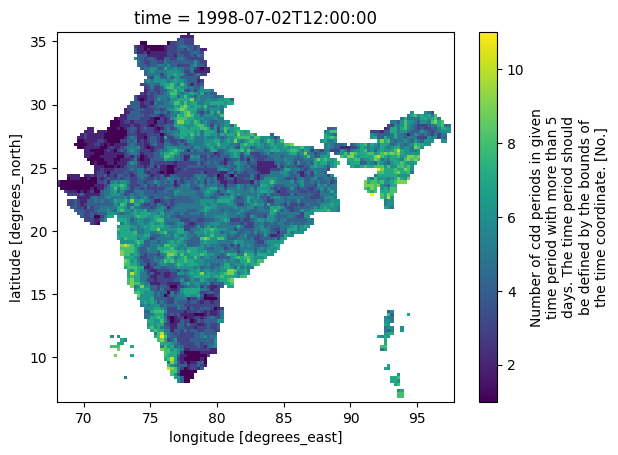

In [ ]:
import matplotlib as ml
Map = cdd_1998['number_of_cdd_periods_with_more_than_5days_per_time_period']
Map.plot()

In [ ]:
# code for creating consecutive dry days files
year = 1998
for i in range(year,2020):
    print(i)
    CDO.etccdi_cdd(input=f'{i}_stack.nc',output=f'{i}_cdd.nc')

1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [ ]:
# code for creating consecutive wet days files
year = 1998
for i in range(year,2020):
    print(i)
    CDO.etccdi_cwd(input=f'{i}_stack.nc',output=f'{i}_cwd.nc')

1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [ ]:
CDO.operators

{'abs': 1,
 'acos': 1,
 'add': 1,
 'addc': 1,
 'addtrend': 1,
 'adipot': 1,
 'adisit': 1,
 'aexpr': 1,
 'aexprf': 1,
 'after': 1,
 'afterburner': 1,
 'anomaly': 1,
 'ap2hl': 1,
 'ap2hlx': 1,
 'ap2pl': 1,
 'ap2plx': 1,
 'apply': 1,
 'arg': 1,
 'asin': 1,
 'atan': 1,
 'atan2': 1,
 'bandpass': 1,
 'bitrounding': 1,
 'bottomvalue': 1,
 'boxavg': 1,
 'cat': 1,
 'cdiread': 0,
 'cdiwrite': 1,
 'changemulti': 1,
 'chcode': 1,
 'chlevel': 1,
 'chlevelc': 1,
 'chlevelv': 1,
 'chltype': 1,
 'chname': 1,
 'chparam': 1,
 'chtabnum': 1,
 'chunit': 1,
 'chvar': 1,
 'clone': 1,
 'cloudlayer': 1,
 'cmor': 0,
 'cmorlite': 1,
 'codetab': 0,
 'collgrid': 1,
 'complextopol': 2,
 'complextorect': 2,
 'conj': 1,
 'consecsum': 1,
 'consects': 1,
 'const': 1,
 'contour': 1,
 'conv_cmor_table': 0,
 'copy': 1,
 'cos': 1,
 'coshill': 1,
 'dayadd': 1,
 'dayavg': 1,
 'daycount': 1,
 'daydiv': 1,
 'daymax': 1,
 'daymean': 1,
 'daymin': 1,
 'daymul': 1,
 'daypctl': 1,
 'dayrange': 1,
 'daystd': 1,
 'daystd1': 1,
 'da

In [30]:
# file = open('./values.txt',"+a")
# for i in GPM_data['GPM_3IMERGHHE_06_precipitationCal'].values:
#     file.writelines(str(i))
# file.close()

In [11]:
ydaymin = CDO.ydaymin(input="./A_Stack_Yearwise/2010_stack.nc")
ydaymax = CDO.ydaymax(input="./A_Stack_Yearwise/2010_stack.nc")

In [12]:
CDO.ydaypctl(95,input=f"./A_Stack_Yearwise/2010_stack.nc {ydaymin} {ydaymax}",output="./ydaypctl.nc")

'./ydaypctl.nc'

In [13]:
CDO.eca_r95p(input="A_Stack_Yearwise/2010_stack.nc ydaypctl.nc",output="./A_prec_2010.nc")

'./A_prec_2010.nc'

In [4]:
import xarray as xr

In [91]:
data = xr.open_dataset('./A_Stack_Yearwise/1998_stack.nc')
data_points = []
for i in data['TRMM_3B42_7_precipitation'].values[0]:
    for j in i:
        print(j)
        data_points.append(j)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.0
0.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [29]:
data_points
len(data_points)

13923

In [30]:
lat = data['lat']
lon = data['lon']
print(lat)
lon

<xarray.DataArray 'lat' (lat: 117)>
array([ 6.625,  6.875,  7.125,  7.375,  7.625,  7.875,  8.125,  8.375,  8.625,
        8.875,  9.125,  9.375,  9.625,  9.875, 10.125, 10.375, 10.625, 10.875,
       11.125, 11.375, 11.625, 11.875, 12.125, 12.375, 12.625, 12.875, 13.125,
       13.375, 13.625, 13.875, 14.125, 14.375, 14.625, 14.875, 15.125, 15.375,
       15.625, 15.875, 16.125, 16.375, 16.625, 16.875, 17.125, 17.375, 17.625,
       17.875, 18.125, 18.375, 18.625, 18.875, 19.125, 19.375, 19.625, 19.875,
       20.125, 20.375, 20.625, 20.875, 21.125, 21.375, 21.625, 21.875, 22.125,
       22.375, 22.625, 22.875, 23.125, 23.375, 23.625, 23.875, 24.125, 24.375,
       24.625, 24.875, 25.125, 25.375, 25.625, 25.875, 26.125, 26.375, 26.625,
       26.875, 27.125, 27.375, 27.625, 27.875, 28.125, 28.375, 28.625, 28.875,
       29.125, 29.375, 29.625, 29.875, 30.125, 30.375, 30.625, 30.875, 31.125,
       31.375, 31.625, 31.875, 32.125, 32.375, 32.625, 32.875, 33.125, 33.375,
       33.625, 3

<xarray.DataArray 'lon' (lon: 119)>
array([68.125, 68.375, 68.625, 68.875, 69.125, 69.375, 69.625, 69.875, 70.125,
       70.375, 70.625, 70.875, 71.125, 71.375, 71.625, 71.875, 72.125, 72.375,
       72.625, 72.875, 73.125, 73.375, 73.625, 73.875, 74.125, 74.375, 74.625,
       74.875, 75.125, 75.375, 75.625, 75.875, 76.125, 76.375, 76.625, 76.875,
       77.125, 77.375, 77.625, 77.875, 78.125, 78.375, 78.625, 78.875, 79.125,
       79.375, 79.625, 79.875, 80.125, 80.375, 80.625, 80.875, 81.125, 81.375,
       81.625, 81.875, 82.125, 82.375, 82.625, 82.875, 83.125, 83.375, 83.625,
       83.875, 84.125, 84.375, 84.625, 84.875, 85.125, 85.375, 85.625, 85.875,
       86.125, 86.375, 86.625, 86.875, 87.125, 87.375, 87.625, 87.875, 88.125,
       88.375, 88.625, 88.875, 89.125, 89.375, 89.625, 89.875, 90.125, 90.375,
       90.625, 90.875, 91.125, 91.375, 91.625, 91.875, 92.125, 92.375, 92.625,
       92.875, 93.125, 93.375, 93.625, 93.875, 94.125, 94.375, 94.625, 94.875,
       95.125, 95.375, 95.625, 95.875, 96.125, 96.375, 96.625, 96.875, 97.125,
       97.375, 97.625])
Coordinates:
  * lon      (lon) float64 68.12 68.38 68.62 68.88 ... 96.88 97.12 97.38 97.62
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X
    bounds:         lon_bnds

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
import pandas as pd
import numpy as np

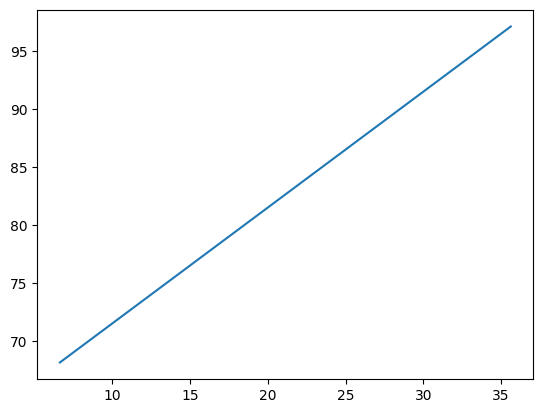

In [11]:
plt.plot(lat,lon[:-2])

In [153]:
prec_data = np.array(data_points).reshape(117,117)

ValueError: cannot reshape array of size 13923 into shape (117,117)

In [18]:
117*117

13689

(117,)


ValueError: 'c' argument has 13689 elements, which is inconsistent with 'x' and 'y' with size 117.

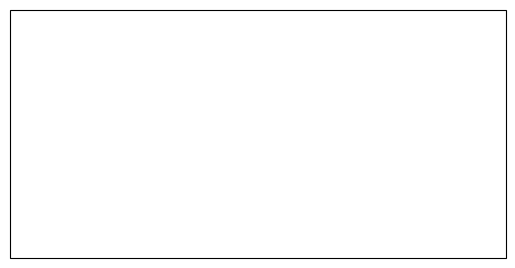

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
# print(data_points)
# Sample data (replace with your data)
# latitude = lat.values  # Example latitudes
# longitude = lon[:-2].values  # Example longitudes
# precipitation = data_points[::-1]  # Example precipitation values
latitude = np.arange(6.625,35.62+0.25,0.25)
longitude = np.arange(68.12,97.62+0.25,0.25)[:-2]
print(latitude.shape)
precipitation = np.arange(0,13689).reshape(117,117)
# Create a figure and axis with a specific projection (PlateCarree for lat/lon)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Scatter plot of latitudes and longitudes with color representing precipitation
sc = ax.scatter(longitude, latitude, c=precipitation, cmap='viridis', s=50)

# Add colorbar for precipitation
cbar = plt.colorbar(sc, ax=ax, label='Precipitation (mm)')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines()

# Add land and ocean features (optional)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, edgecolor='black')

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Precipitation Map')

plt.show()


In [77]:
sns.lineplot(x=lat.values,y=lon.values,hue=data_points)

ValueError: Per-column arrays must each be 1-dimensional

In [65]:
data['very_wet_days_wrt_95th_percentile_of_reference_period'].values[0].shape

(117, 119)

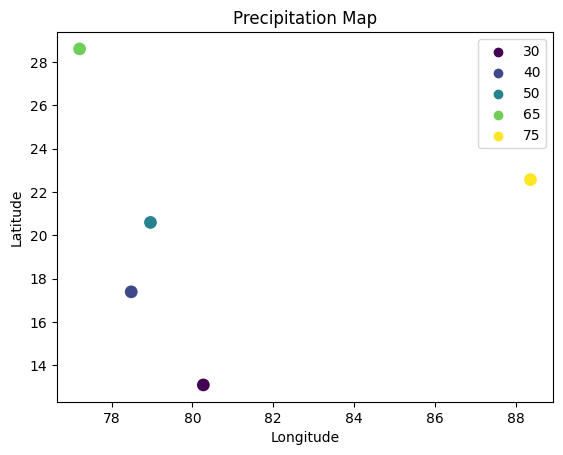

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your data)
latitude = [20.5937, 28.6139, 13.0827, 22.5726, 17.3850]  # Example latitudes
longitude = [78.9629, 77.2090, 80.2707, 88.3639, 78.4867]  # Example longitudes
precipitation = [50, 65, 30, 75, 40]  # Example precipitation values

# Create a scatter plot with Seaborn
sns.scatterplot(x=longitude, y=latitude, hue=precipitation, palette='viridis', s=100)

# Set axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Precipitation Map')

# Display the plot
plt.show()


In [87]:
len(lon.values[:-2])
# len(lat.values)
# data_points = np.array(data_points)
# data_points.resize(117,117)
# data_points = data['TRMM_3B42_7_precipitation'].values[0]
# data_points.resize(117,117)
# data_points = pd.DataFrame(data_points)
# data_points.fillna(-3)
data_points.shape
len(data_points)

117

In [157]:
data_points

<xarray.DataArray 'TRMM_3B42_7_precipitation' (lat: 117, lon: 119)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 68.12 68.38 68.62 68.88 ... 96.88 97.12 97.38 97.62
  * lat      (lat) float64 6.625 6.875 7.125 7.375 ... 34.88 35.12 35.38 35.62

<Axes: >

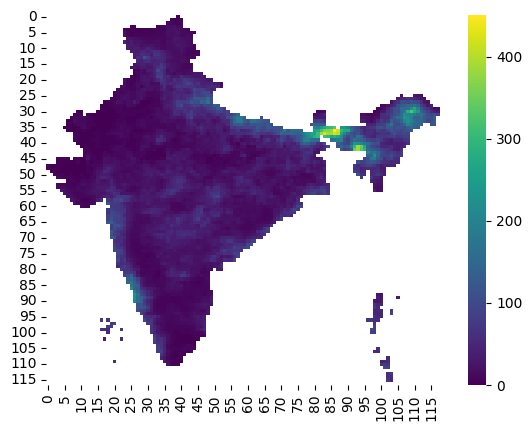

In [149]:
# data_points = data['TRMM_3B42_7_precipitation'].values[0]
sns.heatmap(data_points[::-1],cmap='viridis') # always provide reversed dataframe to the function

In [145]:
count = 0
# this is to combine all the data of 1998_00 hrs stack into one data_point, then we will provide this data_point to heatmap
data_points = data['TRMM_3B42_7_precipitation'][0]
for i in data['TRMM_3B42_7_precipitation']:
    data_points = data_points+i

In [154]:
# for i in data_points.values:
#     i = list(i).reverse()
#     print(i,end="  ")
#     print()

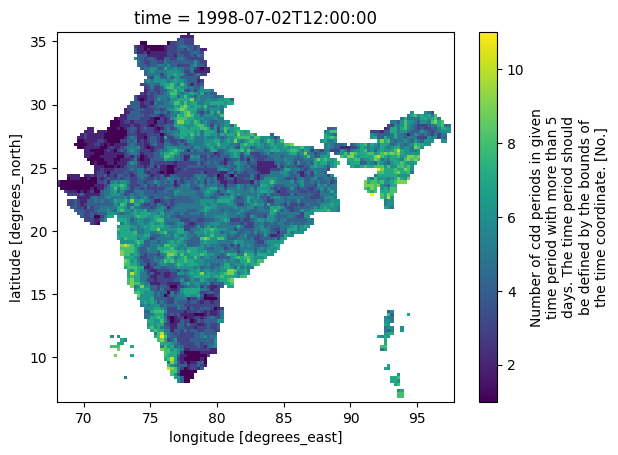

In [1]:
import xarray as xr
cdd_data = xr.open_dataset('./CDD_Consecutive_Dry_Days/1998_cdd.nc')
cdd_data['number_of_cdd_periods_with_more_than_5days_per_time_period'].plot()

<Axes: >

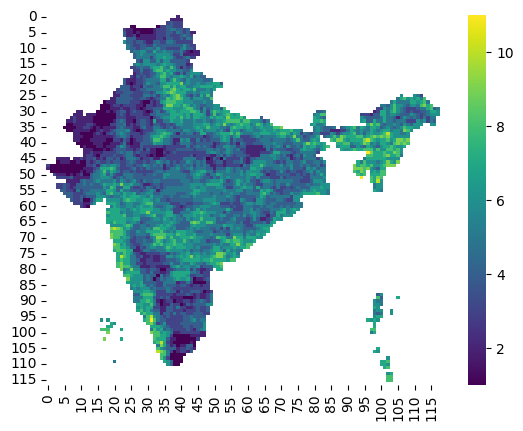

In [176]:
sns.heatmap(cdd_data['number_of_cdd_periods_with_more_than_5days_per_time_period'].values[0][::-1],cmap='viridis')

In [8]:
points = []
temp = []
import numpy as np
for i in cdd_data['cddETCCDI'].values[0]:
    temp=[]
    for j in i:
        if(j!=np.NaN):
            j = float(j/1000000000000000)
            temp.append(j)
            # print(j)
    points.append(temp)
for i in points:
    print(i)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [7]:
cdd_data['cddETCCDI'] = cdd_data['cddETCCDI'].fillna(0)
cdd_data['cddETCCDI'].values[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype='timedelta64[ns]')

<Axes: >

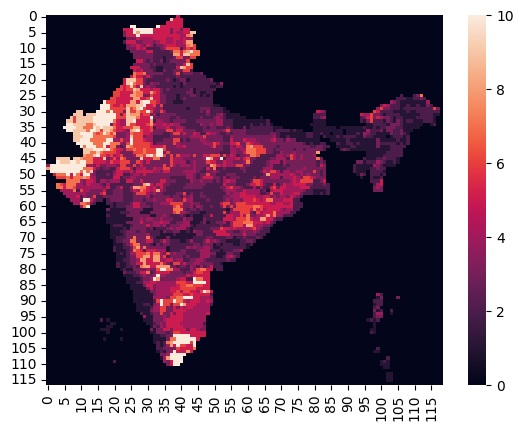

In [9]:
sns.heatmap(points[::-1])

In [225]:
very_wet_day_data = xr.open_dataset('./1998_very_wet_days.nc')
very_wet_day_data['very_wet_days_wrt_95th_percentile_of_reference_period'].values[0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

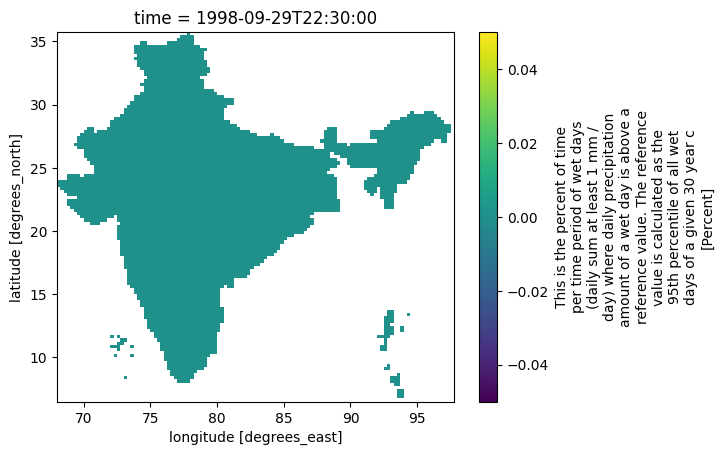

In [226]:
very_wet_day_data['very_wet_days_wrt_95th_percentile_of_reference_period'].plot()

In [227]:
for i in very_wet_day_data['very_wet_days_wrt_95th_percentile_of_reference_period'].values[0]:
    print(i)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  0.  0. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan

In [2]:
import pandas as pd

In [10]:
cdd_values = [[0]]
for i in range(1998,2020):
    path = './CDD_Consecutive_Dry_Days/'
    # print(f'{path+str(i)}_cdd.nc')
    cdd_data = xr.open_dataset(f'{path+str(i)}_cdd.nc')
    print(cdd_data['cddETCCDI'].values[0])
    cdd_values = cdd_values + cdd_data['cddETCCDI'].values[0]
    # for j in cdd_data['cddETCCDI'].values[0]:
    #     print(j)

[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' '

In [13]:
cdd_values = pd.DataFrame(cdd_values).fillna(0)
for i in cdd_values:
    # for j in i:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118


In [14]:
d_points = []
temp_points = []

for i in cdd_values.values:
    temp_points=[]
    for j in i:
        if(j!=0):
            j = float(str(j).split(" ")[0])/22
            # print(j)
        temp_points.append(j)
    d_points.append(temp_points)
d_points

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [18]:
import seaborn as sns
import numpy as np

# 22 years CDD graph

<Axes: >

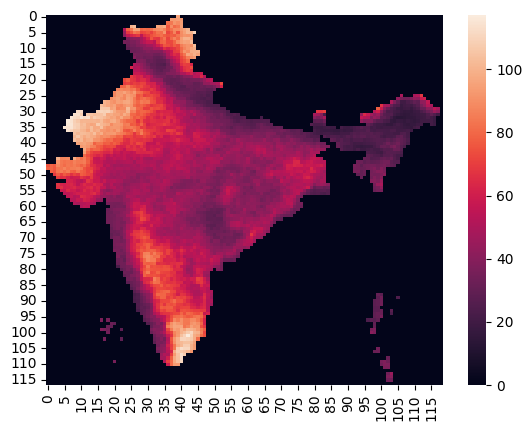

In [17]:
sns.heatmap(d_points[::-1])